<a href="https://colab.research.google.com/github/AhmedCoolProjects/data-science-projects/blob/main/LoanPrediction_v1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [57]:
# to create dataframes
import pandas as pd
# to create plots
import matplotlib.pyplot as plt
import seaborn as sns

# to make it work on Jupyter Notebook
%matplotlib inline

# Importing our data

In [58]:
df_train = pd.read_csv("/content/train.csv")
df_test= pd.read_csv("/content/test.csv")
y = df_train['Loan_Status']
df_train.drop('Loan_Status', axis = 1, inplace = True)
# df = df_train.append(df_test)
df2 = df_train.append(df_test)
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


# Preprocessing our data

In [59]:
# let's see the shape of our dataframes
df_train.shape, df_test.shape, df2.shape

((614, 12), (367, 12), (981, 12))

## Understanding the Data

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [61]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


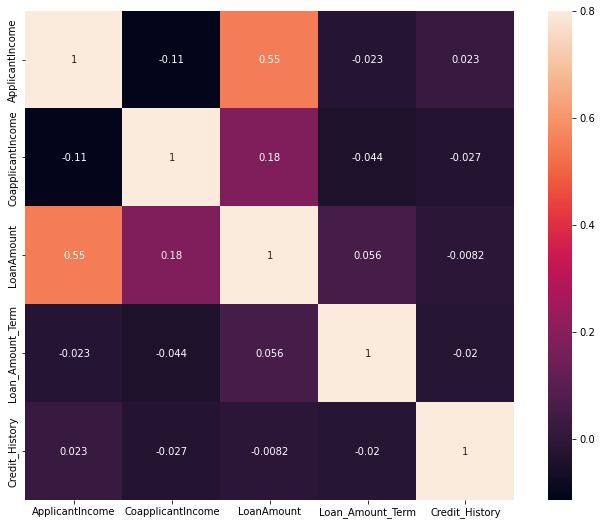

In [62]:
# let's examine the correlation between the numerical data
corr_mat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, annot=True, vmax=.8, square=True)
plt.show()

## Filling missing values

In [63]:
# check the missing values
df2.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [64]:
# fill the missing values with the mean of the column for numerical data
df2.fillna(df2.mean(), inplace=True)
# let's check again
df2.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [65]:
# fill the missing values with the mode of the column for categorical data
for i in range(1, df2.shape[1]):
  column_name = df2.columns[i]
  mode_ = df2[column_name].value_counts().index[0]
  df2[column_name].fillna(mode_, inplace=True)
# let's check again
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Encoding Labels

In [66]:
# import the labelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
# create a labelEncoder object for features
le = LabelEncoder()
# create a lableEncoder object for target
le2 = LabelEncoder()
# drop the Loan_ID column
df2.drop('Loan_ID', axis = 1, inplace = True)
# encode the categorical features data
for i in range(5):
    column_name = df2.columns[i]
    df2[column_name] = le.fit_transform(df2[column_name])
column_name = df2.columns[10]
df2[column_name] = le.fit_transform(df2[column_name])
# encode the categorical target data
y = le2.fit_transform(y)
# check the encoded data
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2


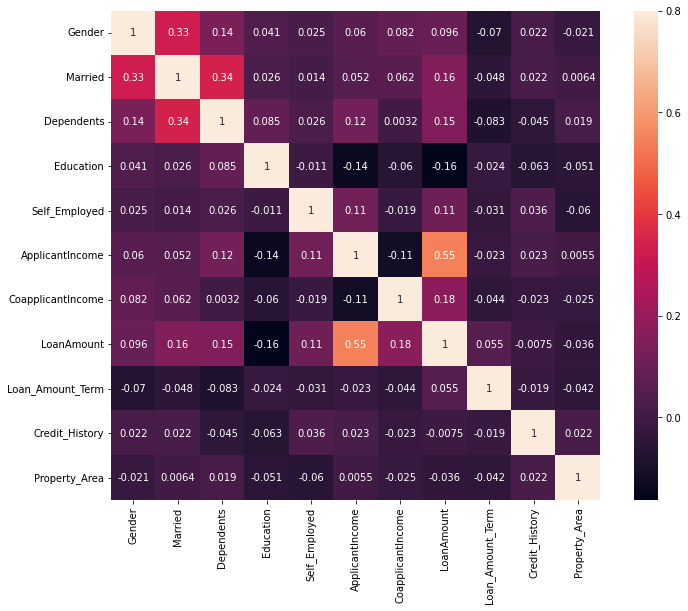

In [67]:
# let's examine again the correlation between our data columns
corr_mat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, annot=True, vmax=.8, square=True)
plt.show()

In [68]:
df2.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.00000,981.000000,981.000000,981.000000
mean,0.814475,0.646279,0.767584,0.222222,0.121305,5179.795107,1601.916330,142.51153,342.201873,0.835920,1.053007
std,0.388921,0.478368,1.030657,0.415952,0.326648,5695.104533,2718.772806,76.34777,64.432886,0.355304,0.801302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,6.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2875.000000,0.000000,101.00000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3800.000000,1110.000000,128.00000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5516.000000,2365.000000,160.00000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.00000,480.000000,1.000000,2.000000


# Create our model

## Spliting the dataset

In [69]:
# let's get the x: features data, this one should have the same size as the y data
x = df2.iloc[:y.shape[0], ]
# now, let's split our data (x, y) into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

## Create our Models

In [70]:
# import the models we want to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create a list of models 
models = []
# add the models to the list as a tuple (name, model)
models.append(("Logistic Regression",LogisticRegression(random_state=7)))
models.append(("Decision Tree",DecisionTreeClassifier(random_state=7)))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier(random_state=7)))
models.append(("Support Vector Classifier",SVC(random_state=7)))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))
# now, let's train each model
for name, model in models:
    model.fit(x_train, y_train)
    # predict the test set results
    y_pred = model.predict(x_test)
    print("Accuracy of %s: %.4f" % (name, accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of Logistic Regression: 0.8293
Accuracy of Decision Tree: 0.7073
Accuracy of Linear Discriminant Analysis: 0.8293
Accuracy of Random Forest: 0.8049
Accuracy of Support Vector Classifier: 0.6829
Accuracy of K- Neirest Neighbour: 0.6179
Accuracy of Naive Bayes: 0.8130


## Save our Model

In [71]:
# let's get our model
lr_model = models[0][1]
# let's save our model
import pickle
file = "lr_model.pkl"
with open(file, "wb") as f:
    pickle.dump(lr_model, f)

In [72]:
with open(file, "rb") as f:
    loaded_model = pickle.load(f)
# use the loaded model to make predictions
r = loaded_model.predict([[0.0,	0.0, 0.0, 1, 0.0, 1811, 1666.0, 54.0, 360.0, 1.0, 2]])[0]
print(r)

1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
